In [1190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


color_pal = sns.color_palette()
df = pd.read_csv('sickness_table.csv')
df = df.drop('Unnamed: 0', axis=1)
df.set_index('date', inplace=True)

df.index = pd.to_datetime(df.index)

# dropping dafted and n_sby here because that information is captured by sby_need.
df = df.drop('dafted', axis =1)
df = df.drop(['n_sby'], axis=1)

df_calls = df.drop(['n_sick', 'sby_need'], axis=1)
df_sick = df.drop(['calls', 'sby_need'], axis=1)
df_sbyneed = df.drop(['calls', 'n_sick'], axis=1)

df_calls.plot(style='-',
        figsize=(15, 6),
        color=color_pal[1],
        title='Sickness Data Table - Calls from 2016-19')
plt.savefig('Sickness Data Table - Calls from 2016-19.png')
plt.show()

df_sick.plot(style='-',
             figsize=(20, 8),
             color=color_pal[0],
             title='Sickness Data Table - Sick Leave Trend from 2016-19',
             grid=False)
plt.xticks(df_sick.index[::30], df_sick.index[::30].strftime('%b %Y'), rotation=45)
plt.savefig('Sickness Data Table - Sick Leave Trend from 2016-19.png')
plt.show()

df_sbyneed.plot(style='-',
             figsize=(15, 7),
             color=color_pal[2],
             title='Sickness Data Table - Trends for Standby Rescuers over the years 2016-19')
plt.savefig('Sickness Data Table - Trends for Standby Rescuers over the years 2016-19.png')
plt.show()



,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0
1151,1151,2019-05-27,77,8790.0,1900,90,0.0,0.0


In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Extract the month from the 'date' column
data['month'] = data['date'].dt.month

# Aggregate the data by month
monthly_aggregated = data.groupby('month').mean().reset_index()

# Plotting Sick Drivers
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregated['month'], monthly_aggregated['n_sick'], marker='o', label='Average Sick Drivers')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Seasonal Patterns of Average Sick Drivers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.grid(True)
plt.savefig('Seasonal Patterns of Average Sick Drivers.png')
plt.show()


# Plotting Emergency Calls
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregated['month'], monthly_aggregated['calls'], marker='o', color='orange', label='Average Emergency Calls')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Seasonal Patterns of Average Emergency Calls')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.savefig('Seasonal Patterns of Average Emergency Calls.png')
plt.show()


# Plotting Standby Needs
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregated['month'], monthly_aggregated['sby_need'], marker='o', color='green', label='Average Standby Needs')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Seasonal Patterns of Average Standby Needs')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.savefig('Seasonal Patterns of Average Standby Needs.png')
plt.show()



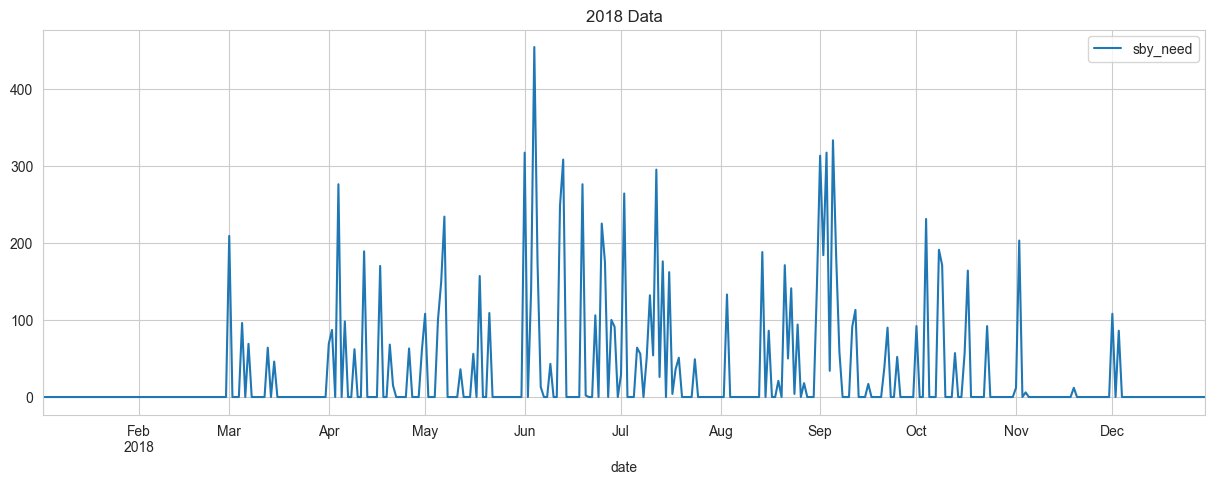

In [1206]:
df_sbyneed.loc[(df_sbyneed.index > '01-01-2018') & (df_sbyneed.index < '12-31-2018')] \
    .plot(figsize=(15, 5), title='2018 Data')
plt.show()

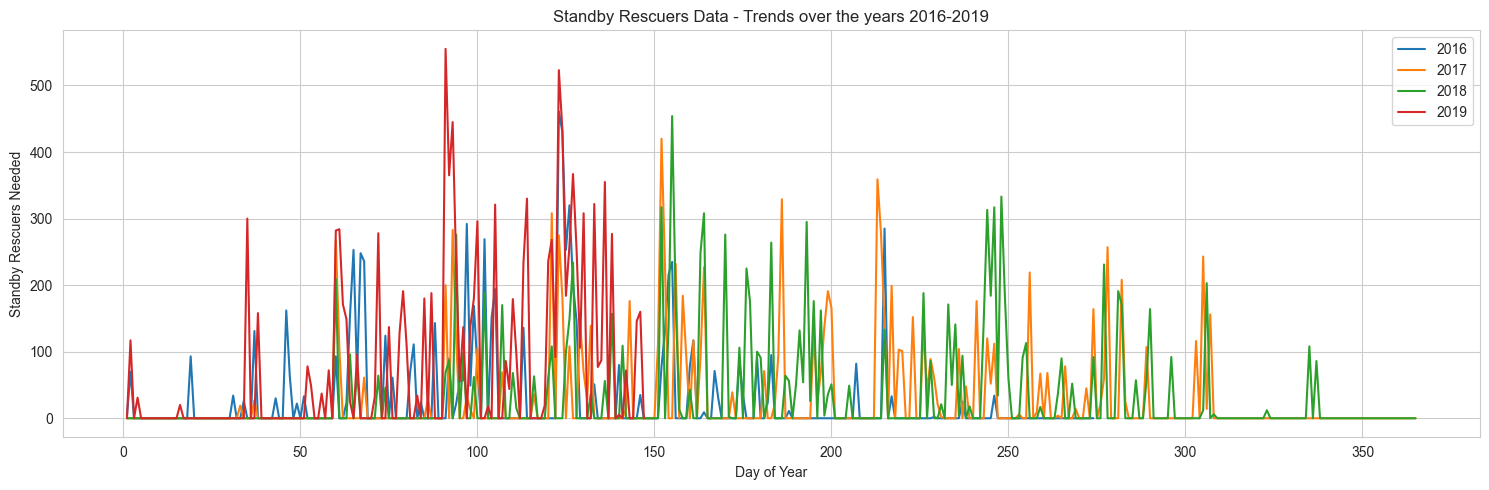

In [1207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sbyneed is your DataFrame

# Get the color palette
color_pal = sns.color_palette( n_colors=4)  # Assuming you want 4 different colors for each year

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each year's data
for year in range(2016, 2020):
    year_data = df_sbyneed[(df_sbyneed.index.year == year) & (df_sbyneed.index.dayofyear <= 365)]
    x_values = range(1, len(year_data) + 1)
    ax.plot(x_values, year_data['sby_need'], label=str(year), color=color_pal[year - 2016])

# Set title and labels
ax.set_title('Standby Rescuers Data - Trends over the years 2016-2019')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Standby Rescuers Needed')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()




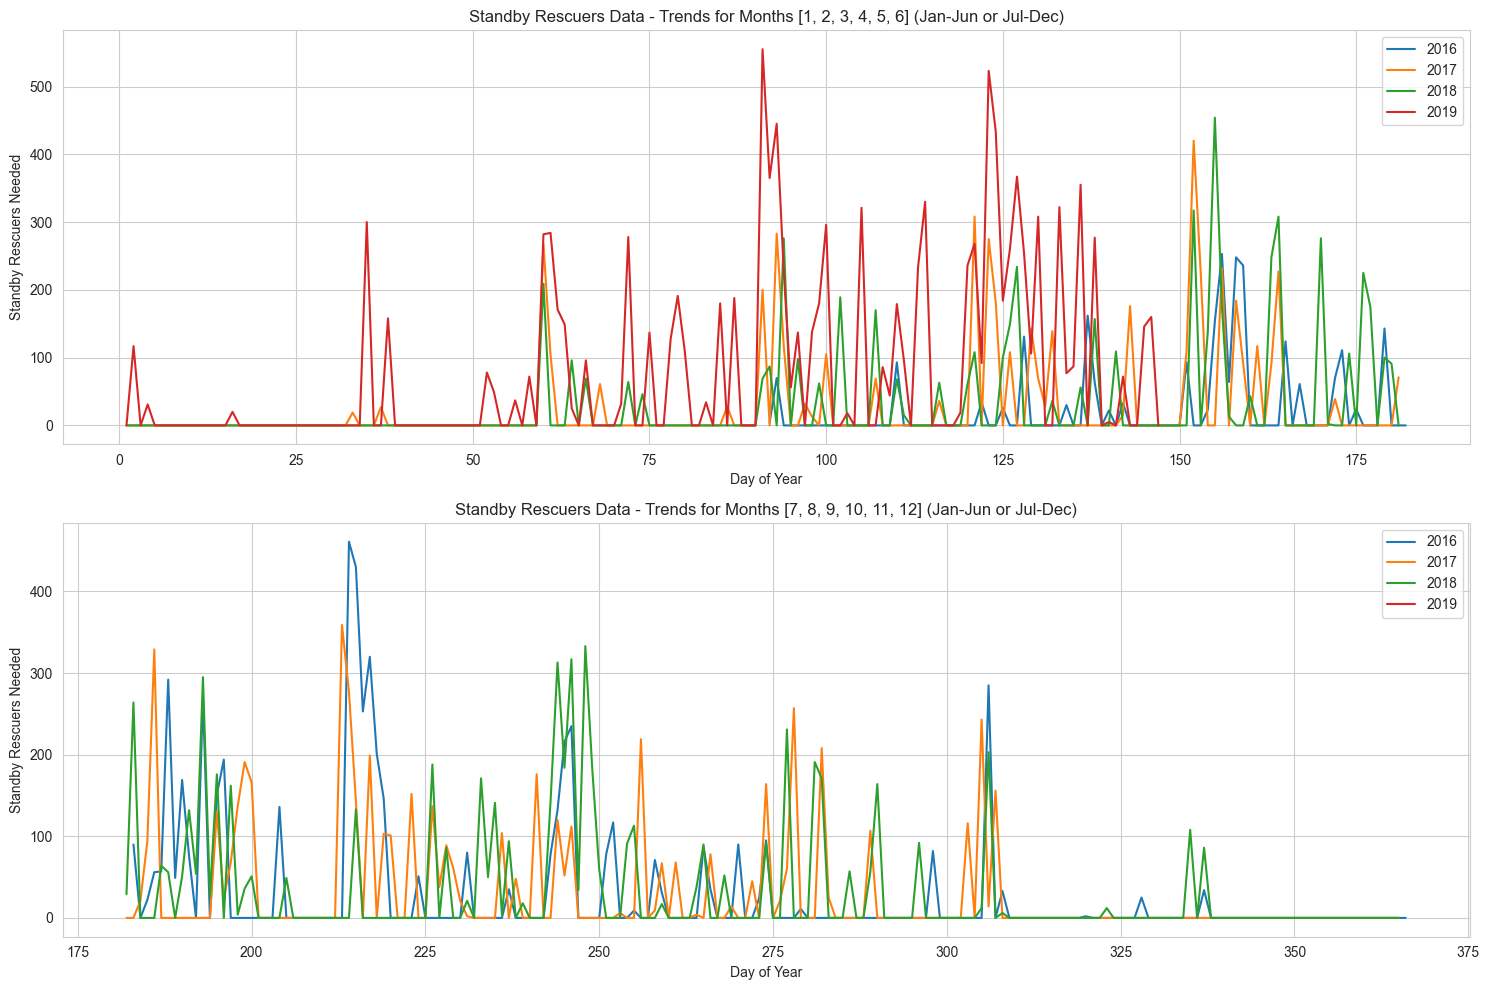

In [1208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sbyneed is your DataFrame

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Iterate over each subplot
for idx, ax in enumerate(axes):
    # Get data for the current date range (Jan-Jun and Jul-Dec) for all years
    if idx == 0:
        date_range_months = [1, 2, 3, 4, 5, 6]
    else:
        date_range_months = [7, 8, 9, 10, 11, 12]

    # Create DataFrames for the selected date range
    df_range = df_sbyneed[df_sbyneed.index.month.isin(date_range_months)]

    # Plot data for each year on the current subplot
    for year in range(2016, 2020):
        year_data = df_range[df_range.index.year == year]
        x_values = year_data.index.dayofyear  # Use day of year as x values
        y_values = year_data['sby_need'].values
        ax.plot(x_values, y_values, label=year)

    # Set title and labels for each subplot
    ax.set_title(f'Standby Rescuers Data - Trends for Months {date_range_months} (Jan-Jun or Jul-Dec)')
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Standby Rescuers Needed')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


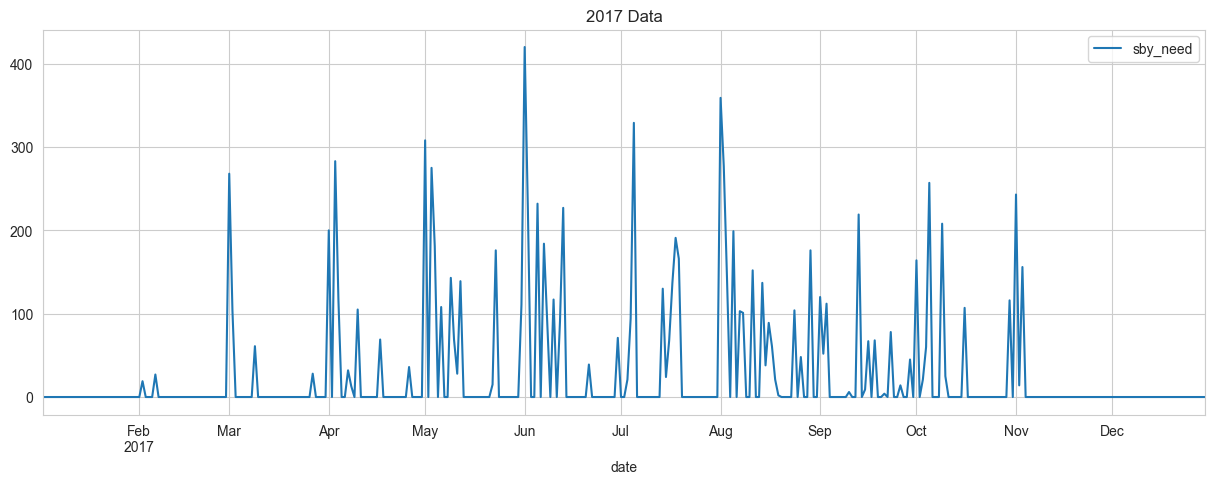

In [1209]:
df_sbyneed.loc[(df_sbyneed.index > '01-01-2017') & (df_sbyneed.index < '12-31-2017')] \
    .plot(figsize=(15, 5), title='2017 Data')
plt.show()

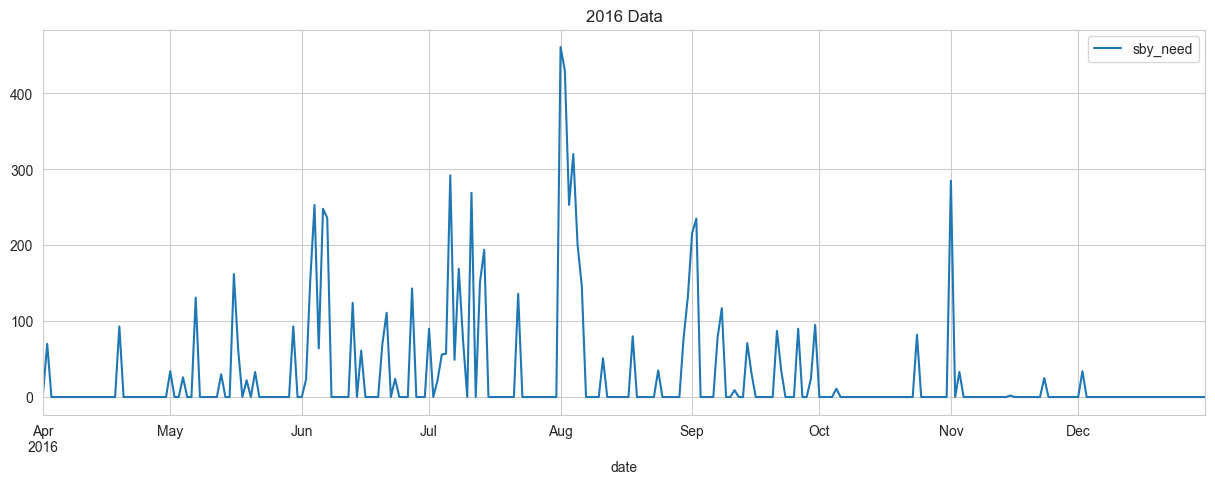

In [1210]:
df_sbyneed.loc[(df_sbyneed.index >= '2016-04-01') & (df_sbyneed.index <= '2016-12-31')] \
    .plot(figsize=(15, 5), title='2016 Data')
plt.show()

In [1211]:
def create_features(dtf) :
    """
    Create time series features from the time index.
    :param dtf: dataframe
    :return:dataframe
    """
    dtf = dtf.copy()
    dtf['dayofweek'] = dtf.index.dayofweek
    dtf['month'] = dtf.index.month
    dtf['year'] = dtf.index.year
    dtf['dayofyear'] = dtf.index.dayofyear
    dtf['dayofmonth'] = dtf.index.day
    dtf['weekofyear'] = dtf.index.isocalendar().week
    dtf['quarter'] = dtf.index.quarter
    return dtf

df = create_features(df)
df


,n_sick,calls,sby_need,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter
date,,,,,,,,,,
2016-04-01,73,8154.0,4.0,4,4,2016,92,1,13,2
2016-04-02,64,8526.0,70.0,5,4,2016,93,2,13,2
2016-04-03,68,8088.0,0.0,6,4,2016,94,3,13,2
2016-04-04,71,7044.0,0.0,0,4,2016,95,4,14,2
2016-04-05,63,7236.0,0.0,1,4,2016,96,5,14,2
...,...,...,...,...,...,...,...,...,...,...
2019-05-23,86,8544.0,0.0,3,5,2019,143,23,21,2
2019-05-24,81,8814.0,0.0,4,5,2019,144,24,21,2
2019-05-25,76,9846.0,146.0,5,5,2019,145,25,21,2


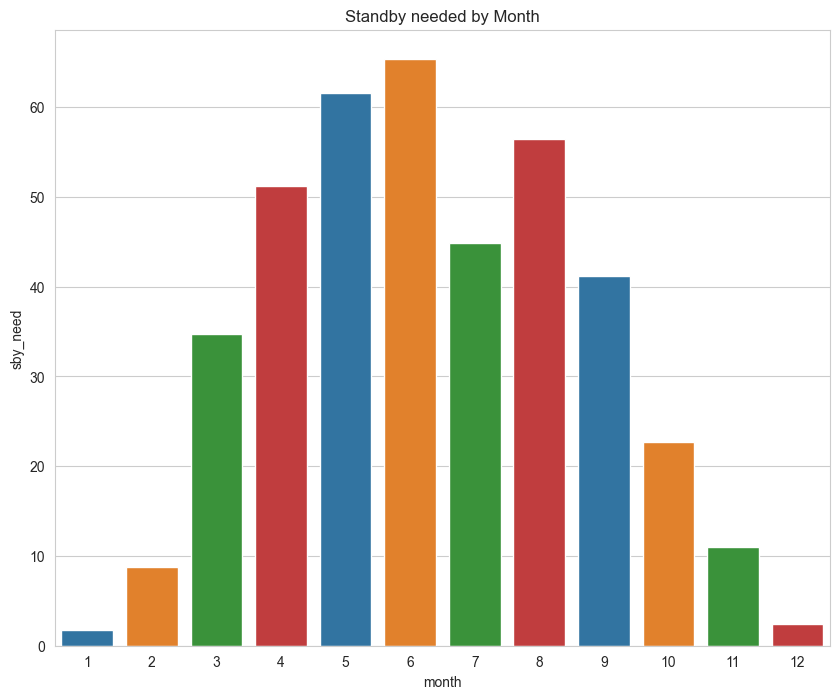

In [1212]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='month', y='sby_need', palette=color_pal, errorbar=None)
ax.set_title('Standby needed by Month')
plt.show()

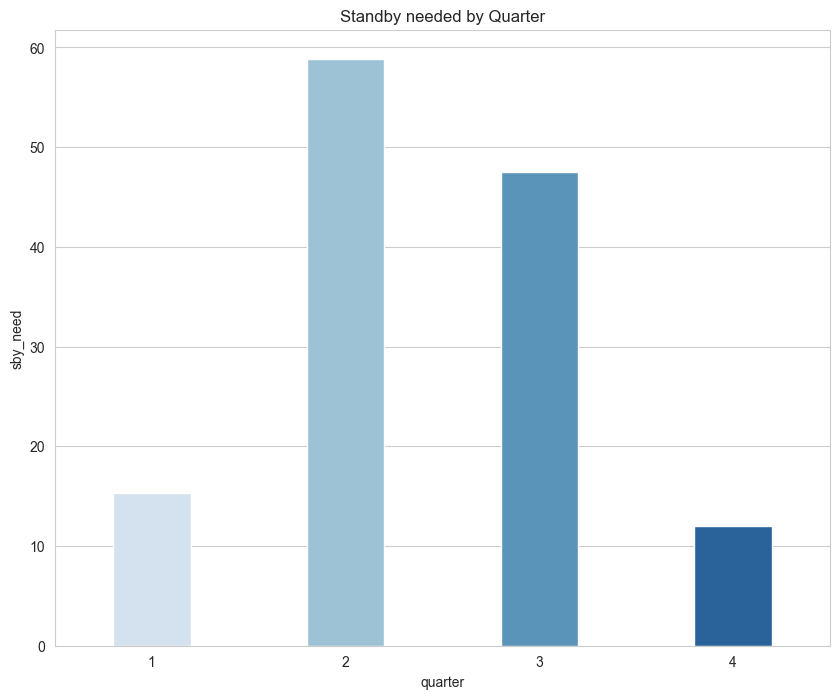

In [1213]:
ig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='quarter', y='sby_need', palette='Blues', width=0.4, errorbar=None)
ax.set_title('Standby needed by Quarter')
plt.show()

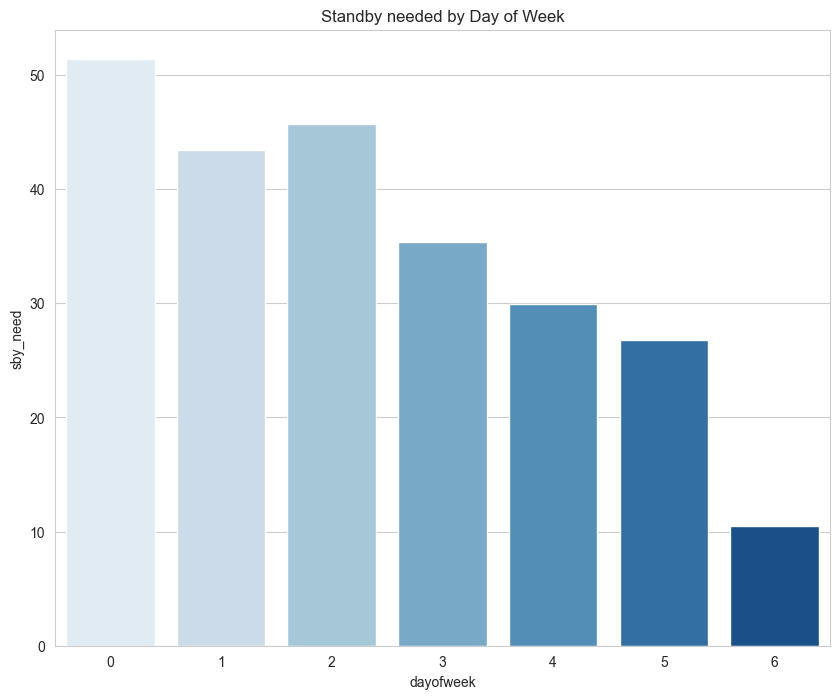

In [1214]:
ig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='dayofweek', y='sby_need', palette='Blues',  errorbar=None)
ax.set_title('Standby needed by Day of Week')
plt.show()

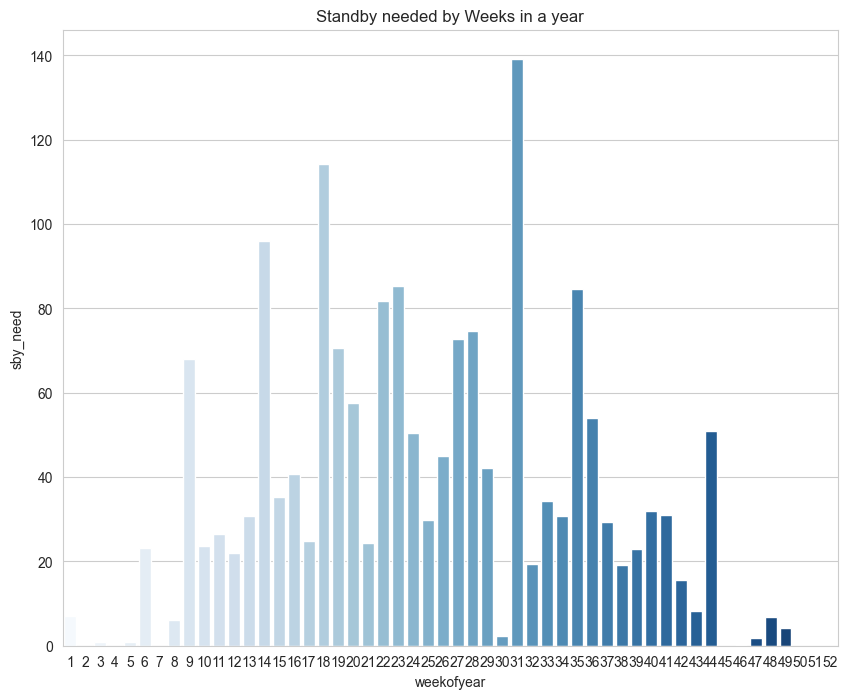

In [1215]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='weekofyear', y='sby_need', errorbar=None, palette='Blues')
ax.set_title('Standby needed by Weeks in a year')
plt.show()

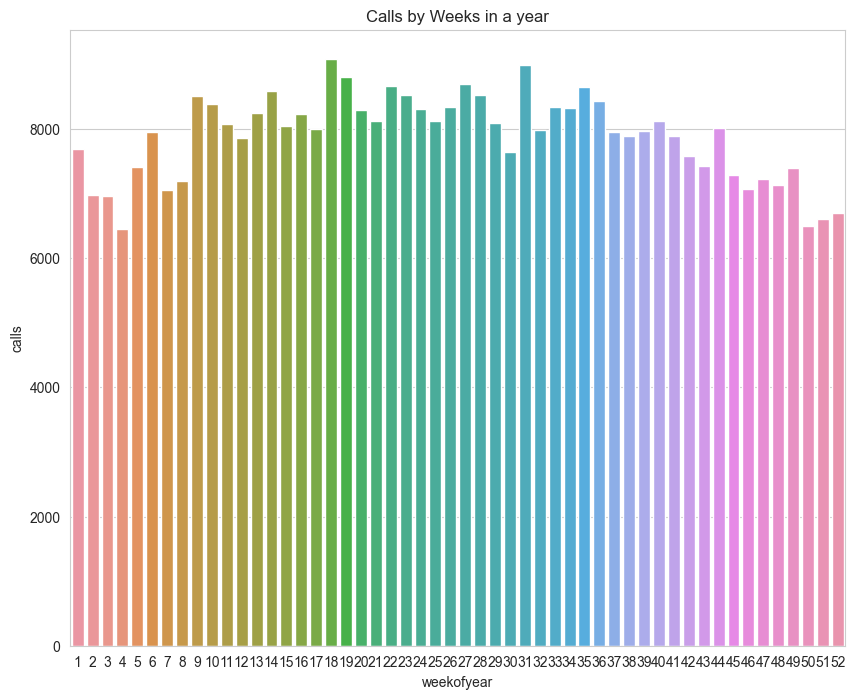

In [1216]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='weekofyear', y='calls', errorbar=None)
ax.set_title('Calls by Weeks in a year')
plt.show()

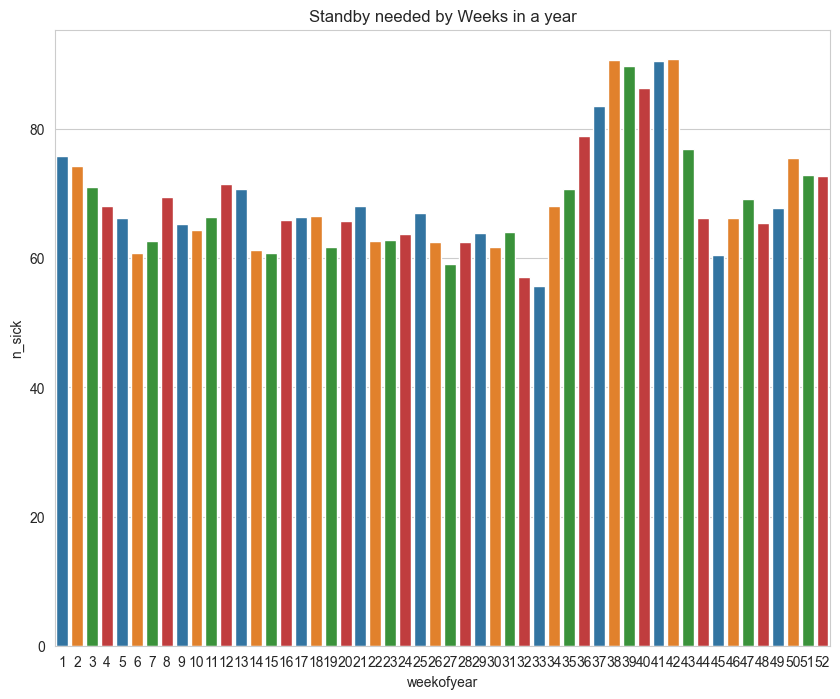

In [1217]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='weekofyear', y='n_sick', errorbar=None, palette=color_pal)
ax.set_title('Standby needed by Weeks in a year')
plt.show()

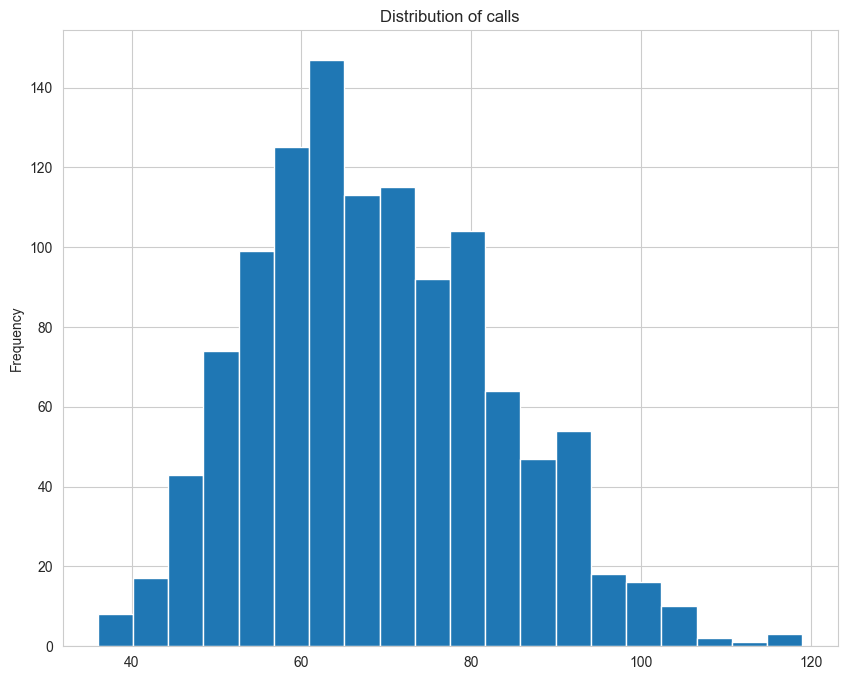

In [1218]:
fig, ax = plt.subplots(figsize=(10, 8))
df['n_sick'].plot.hist(bins=20)
plt.title("Distribution of calls")
plt.show()

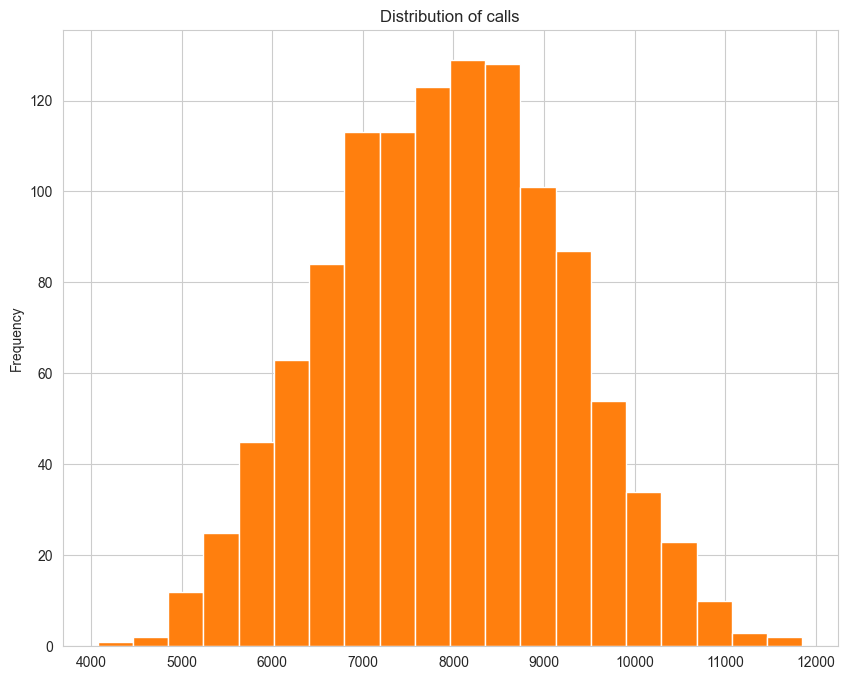

In [1219]:
fig, ax = plt.subplots(figsize=(10, 8))
df['calls'].plot.hist(bins=20, color=color_pal[1])
plt.title("Distribution of calls")
plt.show()

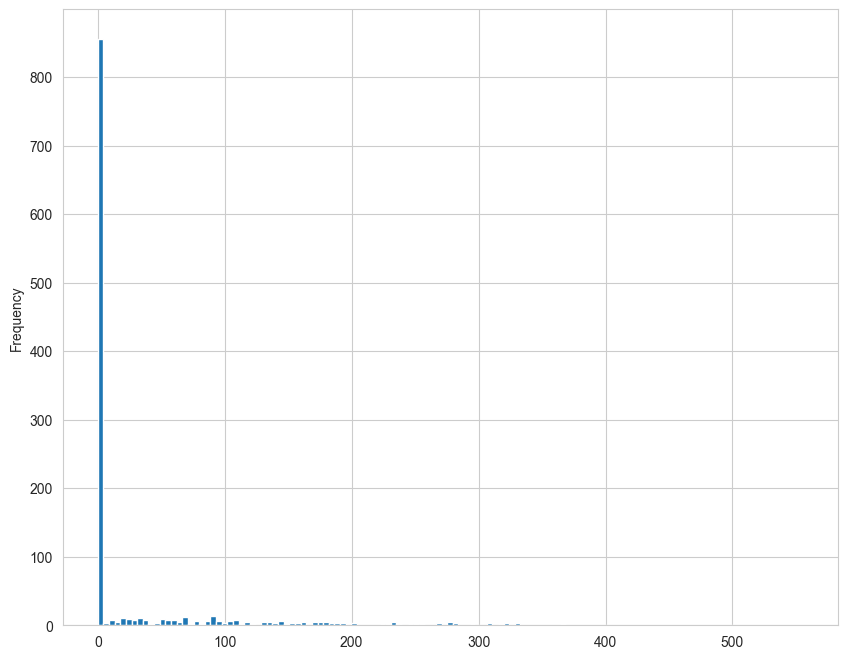

In [1220]:
fig, ax = plt.subplots(figsize=(10, 8))
df['sby_need'].plot.hist(bins=125)
plt.show()

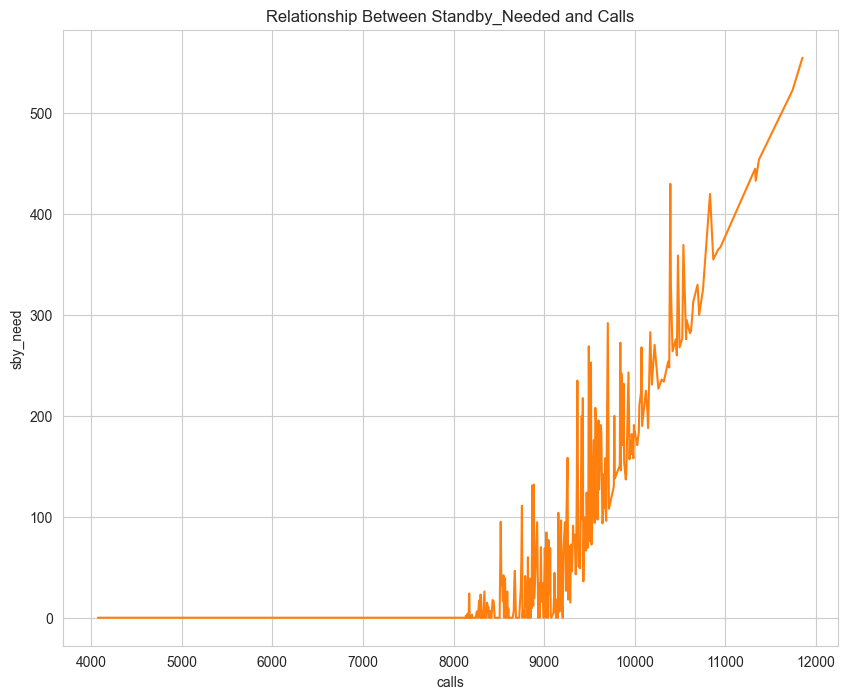

In [1221]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='calls', y='sby_need', errorbar=None, color=color_pal[1])
ax.set_title('Relationship Between Standby_Needed and Calls')
plt.savefig('Relationship Between Standby_Needed and Calls.png')
plt.show()

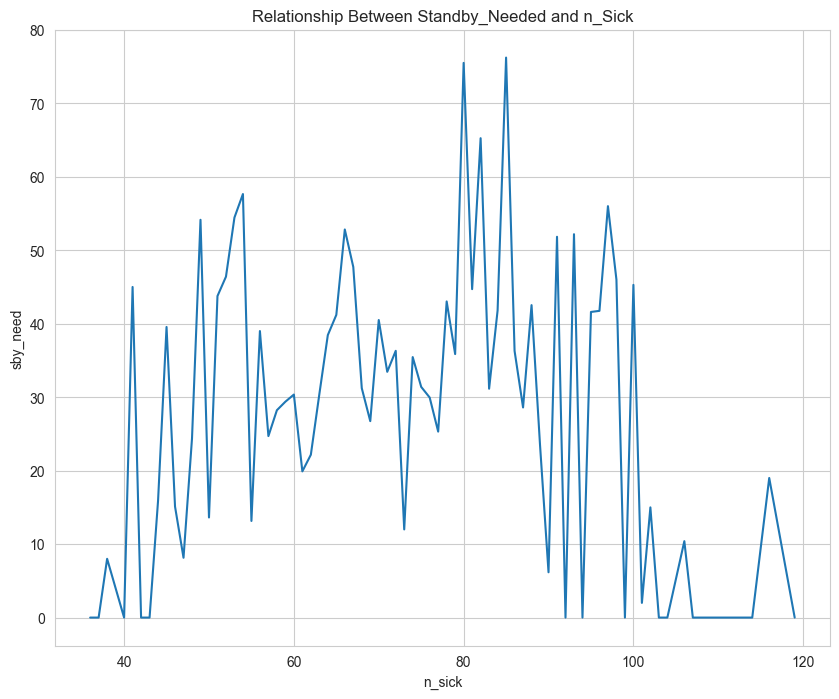

In [1222]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='n_sick', y='sby_need', errorbar=None, color=color_pal[0])
ax.set_title('Relationship Between Standby_Needed and n_Sick')
plt.savefig('Relationship Between Standby_Needed and n_Sick.png')
plt.show()

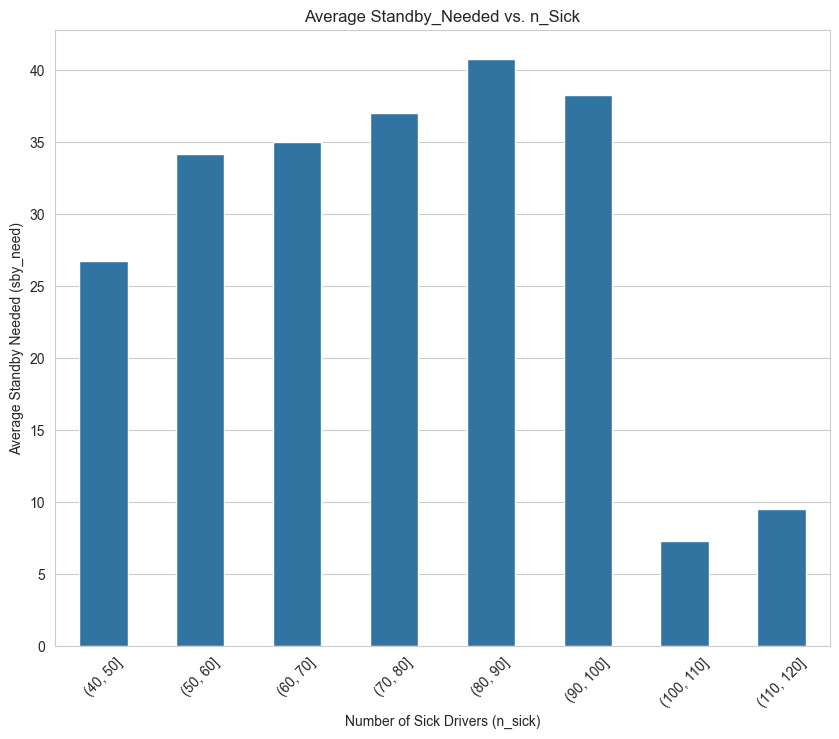

In [1223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read your data
data = pd.read_csv('sickness_table.csv')

# Group data by 'n_sick' and calculate the mean 'sby_need' for each group
grouped_data = data.groupby(pd.cut(data['n_sick'], bins=range(40, 130, 10)))['sby_need'].mean().reset_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=grouped_data, x='n_sick', y='sby_need', color=color_pal[0], width=0.5)
ax.set_title('Average Standby_Needed vs. n_Sick')
ax.set_xlabel('Number of Sick Drivers (n_sick)')
ax.set_ylabel('Average Standby Needed (sby_need)')
plt.xticks(rotation=45)
plt.savefig('Average Standby_Needed vs. n_Sick.png')
plt.show()



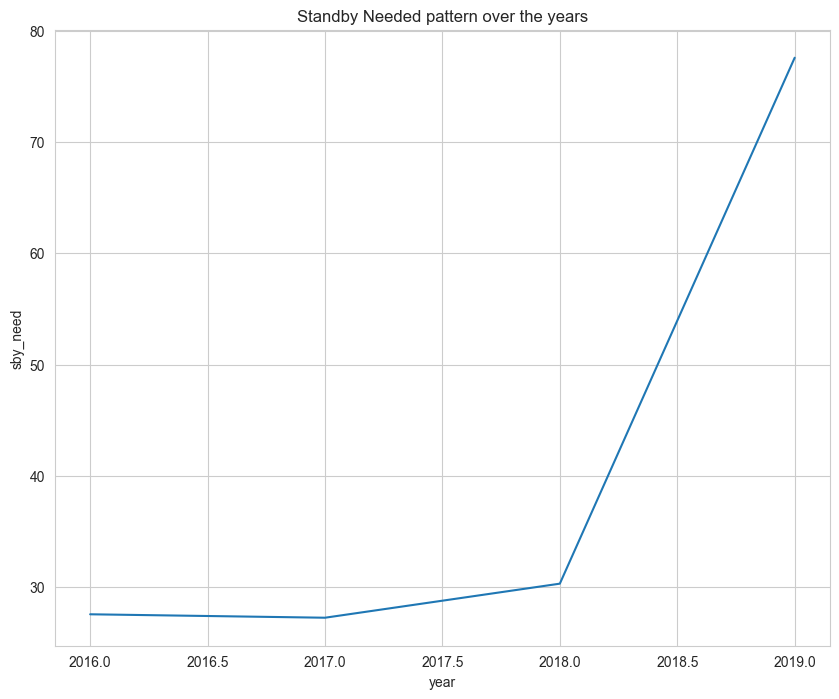

In [1224]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='year', y='sby_need', errorbar=None)
plt.title("Standby Needed pattern over the years")
plt.show()

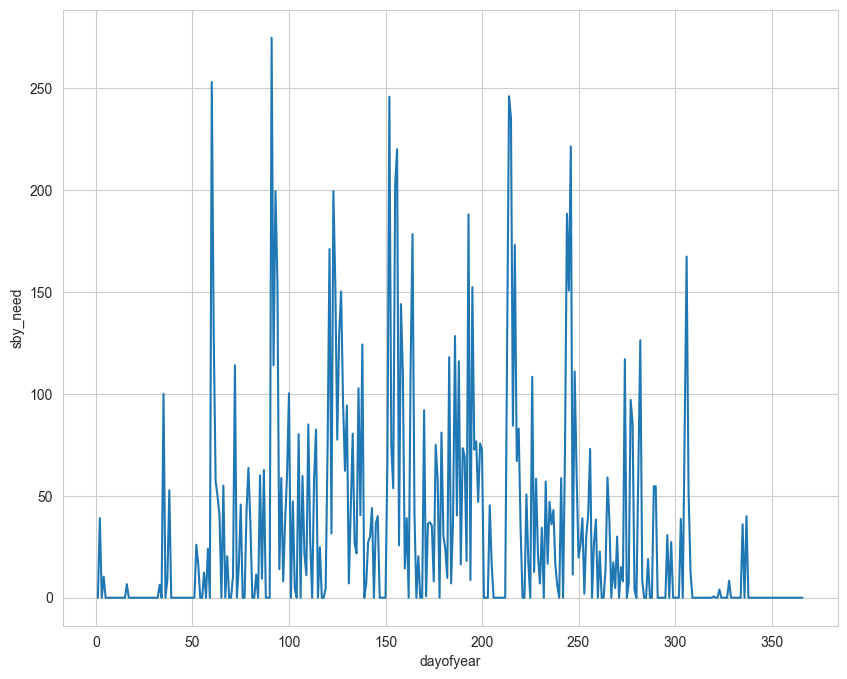

In [1225]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='dayofyear', y='sby_need', errorbar=None)

plt.show()

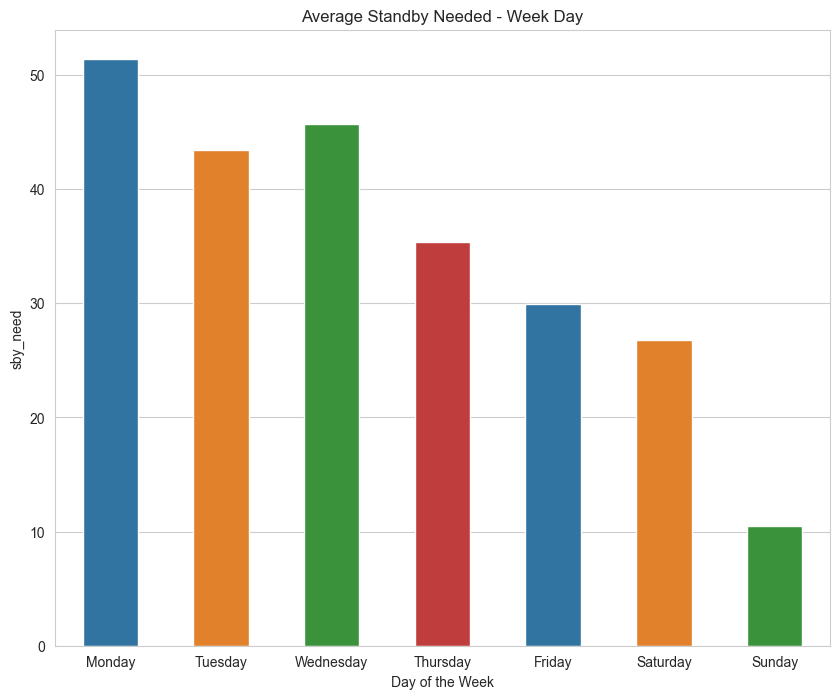

In [1226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Your data plotting code
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='dayofweek', y='sby_need', errorbar=None, palette=color_pal, width=0.5)

# Set x-axis labels to day names
ax.set_xticks(range(7))
ax.set_xticklabels(day_names)
ax.set_xlabel('Day of the Week')
plt.title('Average Standby Needed - Week Day')
plt.savefig('standbyNeed_for_day_of_week.png')

plt.show()


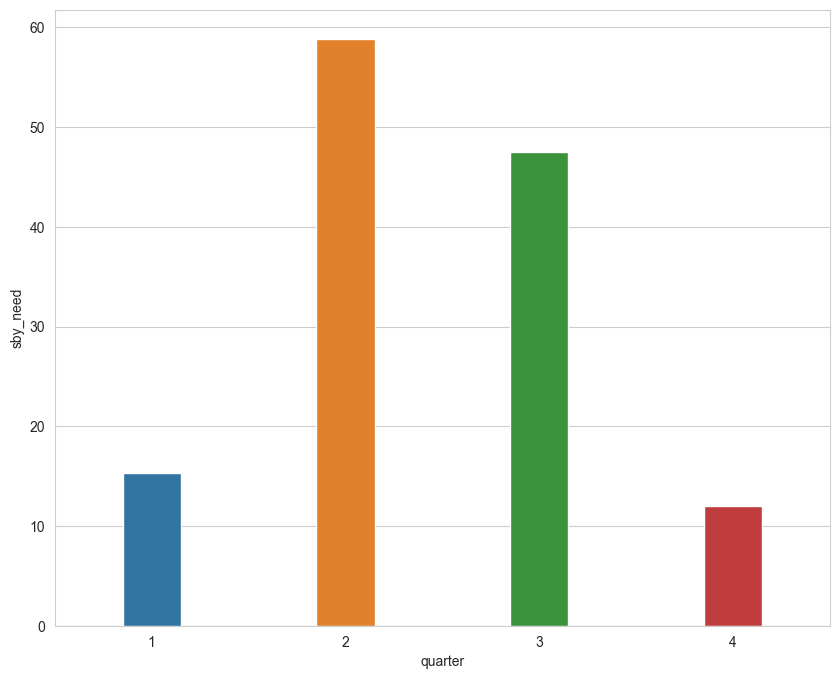

In [1227]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='quarter', y='sby_need', errorbar=None, width=0.3)

plt.show()

In [1228]:
df

,n_sick,calls,sby_need,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter
date,,,,,,,,,,
2016-04-01,73,8154.0,4.0,4,4,2016,92,1,13,2
2016-04-02,64,8526.0,70.0,5,4,2016,93,2,13,2
2016-04-03,68,8088.0,0.0,6,4,2016,94,3,13,2
2016-04-04,71,7044.0,0.0,0,4,2016,95,4,14,2
2016-04-05,63,7236.0,0.0,1,4,2016,96,5,14,2
...,...,...,...,...,...,...,...,...,...,...
2019-05-23,86,8544.0,0.0,3,5,2019,143,23,21,2
2019-05-24,81,8814.0,0.0,4,5,2019,144,24,21,2
2019-05-25,76,9846.0,146.0,5,5,2019,145,25,21,2
